<a href="https://colab.research.google.com/github/sahilchoche/mobile-price-prediction/blob/main/sahil_Copy_of_Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Title - Mobile Price Range Prediction**

###**Problem Statement**- In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is. 

#**Data Description -**
**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w **- Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

#**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import *
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

#**mount drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Loading data**

In [ ]:
file_path = "/content/drive/My Drive/mobile price range prediction/mobile_price_range.csv"
df = pd.read_csv(file_path)

#**Data preparation**

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


###Checking for null values in the data###

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

NO null values

###Checking for duplicates value###

In [ ]:
df.duplicated().sum()

0

No duplicate data in our dataset

#**Feature engineering**

In [ ]:
# replacing sc_h and sc_w with screen size
df['screen_size'] = ((df['sc_h']**2)+(df['sc_w']**2))**0.5

df.drop(['sc_h','sc_w'], axis=1 ,inplace=True)

In [ ]:
#replacing px_height and px_width by px_area
df['pixels']= df['px_height']*df['px_width']
df.drop(['px_height','px_width'], axis=1 ,inplace=True)


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'screen_size',
       'pixels'],
      dtype='object')

#**Visualising the data**

**check dataset balance**

In [ ]:
df["price_range"].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

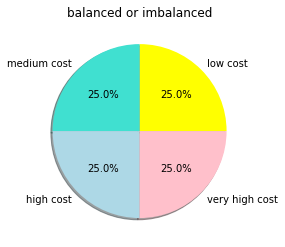

In [ ]:
# check data set balance
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = df['price_range'].value_counts().values
colors = ['yellow', 'turquoise', 'lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct= '%1.1f%%', shadow=True)
ax1.set_title('balanced or imbalanced')
plt.show()

Here the data is blanced and have equal number of phones in different price range

In [ ]:
# divided variable into categorial and continous
categoricals = [ 'blue',  'dual_sim',  'four_g',
         'three_g', 'touch_screen', 'wifi', 'n_cores']

continuous = ['battery_power','clock_speed','fc','int_memory','m_dep', 'mobile_wt', 'pc',
              'ram', 'talk_time','screen_size', 'pixels']

**Analysing categorical variables**

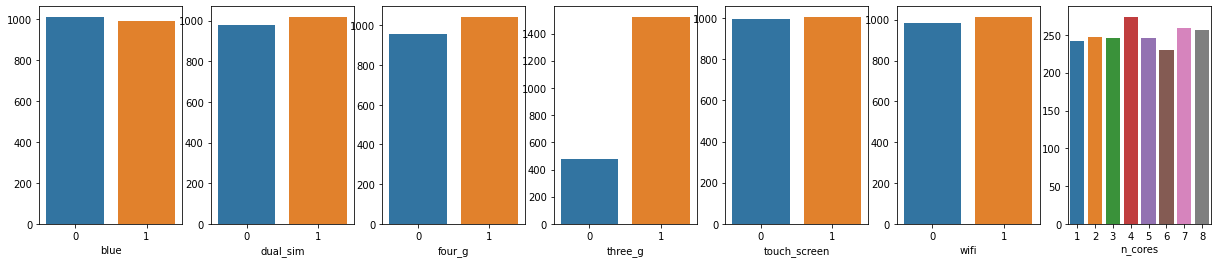

In [ ]:
# analysis categorical variable
fig, axs = plt.subplots(1, len(categoricals), figsize=(21,4))

for i in range(len(categoricals)):
    sns.countplot(x=df[categoricals[i]], ax=axs[i])
    axs[i].set_ylabel('')

Only three_g variable have inbalance data

**Analysing continous variables**

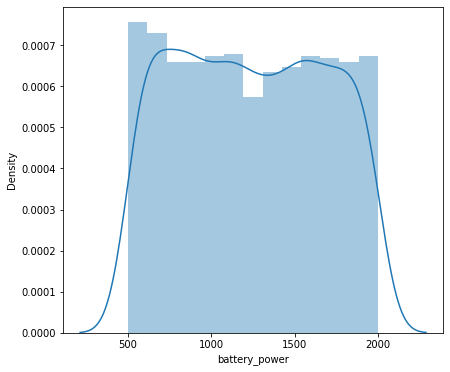

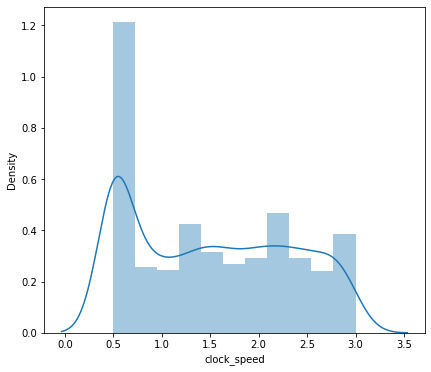

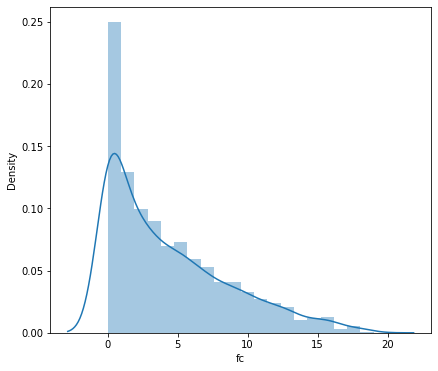

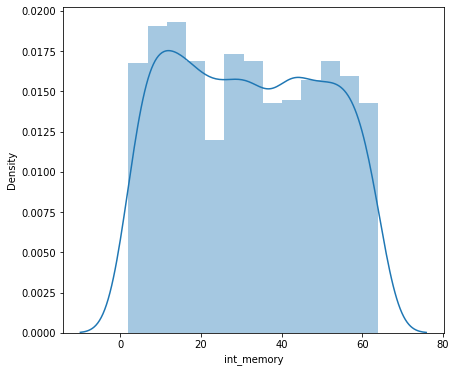

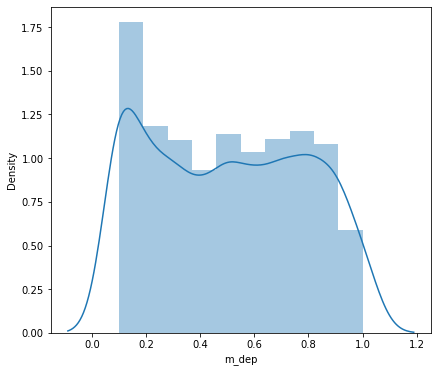

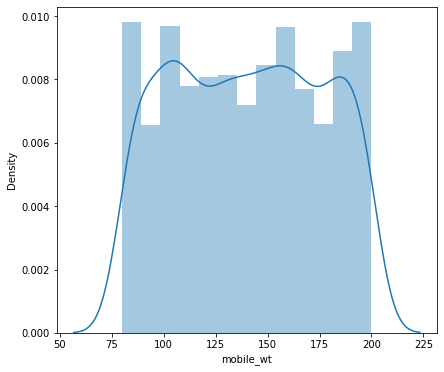

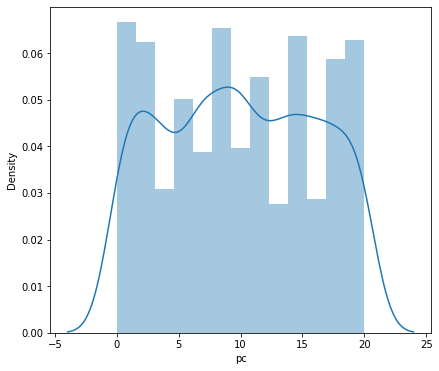

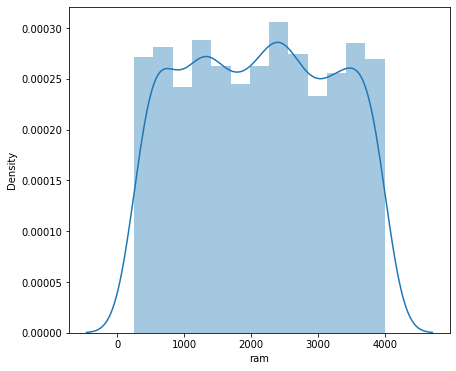

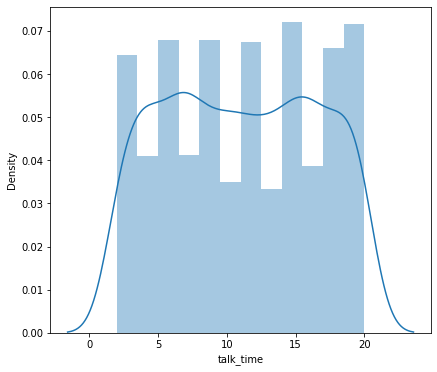

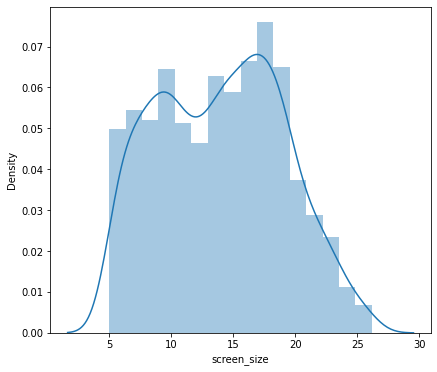

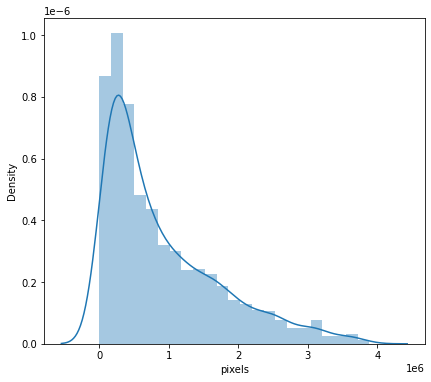

In [ ]:
# analysis continous variable
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('Density')
    fig.set_xlabel(var)

**checking outliers**

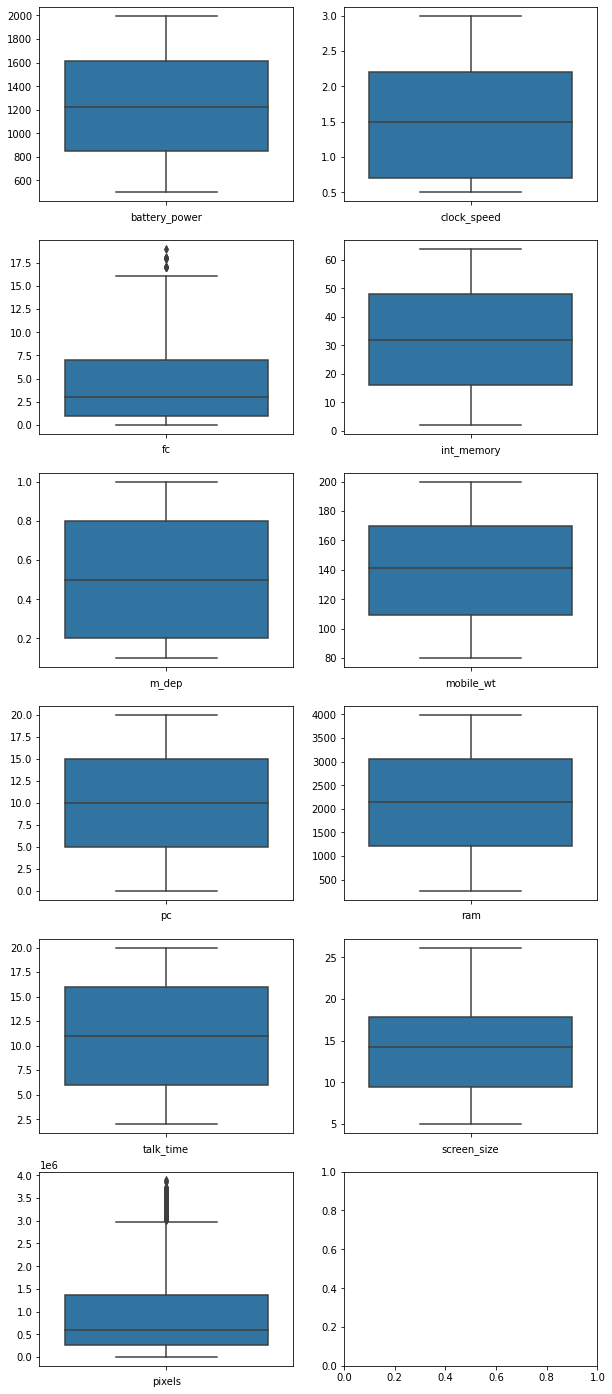

In [ ]:
# checking outliers
fig, axs = plt.subplots(6,2, figsize=(10,25))

for i in range(len(continuous)):
    sns.boxplot(y =df[continuous[i]], ax=axs[i//2][i%2])
    axs[i//2][i%2].set_xlabel(continuous[i])
    axs[i//2][i%2].set_ylabel('')

plt.show()

only fc and pixel have outlier


**Removing outliers**

In [ ]:
# Outliers in fc

# IQR for fc

q1 = df["fc"].quantile(0.25)
q3 = df["fc"].quantile(0.75)
iqr = q3 - q1
print(iqr)
q96 = df["fc"].quantile(0.96)
q96

lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)

print(lower_limit)
print(upper_limit)
df["fc"] = np.where(df["fc"] > upper_limit, q96 ,df['fc'])

6.0
-8.0
16.0


In [ ]:
# Outliers in pixels

# IQR for pixels

q1 = df["pixels"].quantile(0.25)
q3 = df["pixels"].quantile(0.75)
iqr = q3 - q1
print(iqr)
q96 = df["pixels"].quantile(0.96)
q96

lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)

print(lower_limit)
print(upper_limit)
df["pixels"] = np.where(df["pixels"] > upper_limit, q96 ,df['pixels'])

1095826.75
-1380539.625
3002767.375


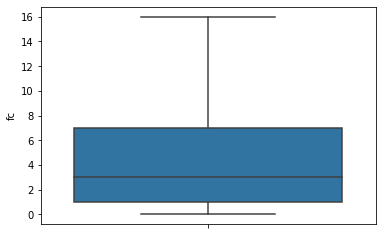

In [ ]:
sns.boxplot(y=df["fc"])


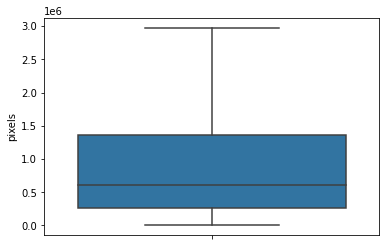

In [ ]:
sns.boxplot(y=df["pixels"])

Here we have no ouliers in pixels and fc column

**CORRELATION**

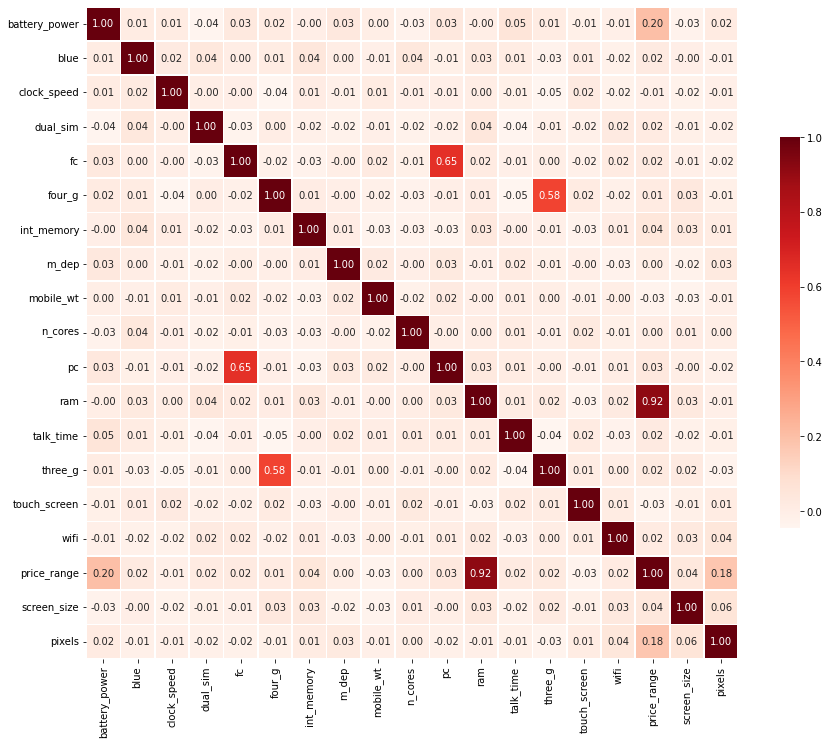

In [ ]:
#correlation of data
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap=plt.cm.Reds, cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

#**Splitting data in train and test**

In [ ]:
# creating dependent and independent variables
X= df.drop(columns='price_range')
y= df['price_range']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 1) 
print(X_train.shape)
print(X_test.shape)

(1600, 18)
(400, 18)


In [ ]:
#data transformation
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#**Logistic model**

**Initial fitting (with default hyperparameters)**

In [ ]:
#logistic
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logmodel.intercept_

array([-3.18755895,  3.11449351,  3.00092594, -2.92786049])

In [ ]:
logmodel.coef_

array([[-2.55397445e+00,  4.51718325e-02,  5.54054294e-02,
         1.55040640e-01, -1.50279290e-01,  1.33697383e-02,
        -1.58011022e-01, -5.75248988e-02,  3.04547208e-01,
        -8.95521994e-02, -3.47381425e-02, -1.05877890e+01,
         2.50465699e-02, -4.49952569e-02,  9.09191320e-02,
         1.62522616e-01, -1.10505825e-01, -2.48445141e+00],
       [-8.01632651e-01,  2.70358085e-02, -7.30125529e-03,
         1.15845302e-02, -6.80635339e-02,  2.17353349e-03,
        -7.23601020e-02,  5.49514537e-02,  1.35025070e-01,
        -1.27743893e-01,  1.21126135e-02, -3.21534506e+00,
        -2.07377227e-02, -1.06126811e-01,  1.62292985e-02,
         3.74031318e-02, -8.61579694e-02, -7.01034571e-01],
       [ 7.89770312e-01, -1.28640097e-02,  1.31786228e-02,
        -1.71717701e-01,  1.05611927e-01, -1.06092521e-01,
        -2.60387408e-02,  1.62346247e-02, -9.92819398e-03,
         6.81973972e-02,  8.92839265e-03,  3.42160456e+00,
         9.58741196e-03,  1.09420553e-01, -1.30921957e

In [ ]:
y_train_pred = logmodel.predict(X_train)
print(f"Accuracy is on train {(y_train_pred == y_train).mean()*100}%")

y_test_pred = logmodel.predict(X_test)
print(f"Accuracy is test {(y_test_pred == y_test).mean()*100}%")

Accuracy is on train 94.8125%
Accuracy is test 89.75%


In [ ]:
# evalution metrics for train
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_auc_score
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       408
           1       0.94      0.94      0.94       404
           2       0.93      0.91      0.92       394
           3       0.96      0.96      0.96       394

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [ ]:
# evalution metrics for test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        92
           1       0.85      0.86      0.86        96
           2       0.89      0.82      0.85       106
           3       0.95      0.92      0.94       106

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



**confusion matrix**

In [ ]:
labels = ['low cost','medium cost', 'high cost', 'very high cost']

[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

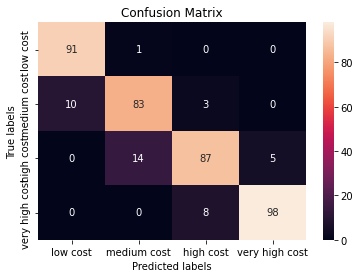

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Hyperparameter Turning**

In [ ]:
logmodel = LogisticRegression()
log_parameters = {"solver": ['newton-cg','lbfg','liblinear'], "penalty": ['l1','l2'],"C":[100,10,1.0,0.1,0.001]}
logmodel = GridSearchCV(logmodel,
                   log_parameters,
                   cv=5,
                   scoring='accuracy')
logmodel.fit(X_train, y_train_pred)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.001],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfg', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
#checking best parameters
logmodel.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
#creating tree with best parameters
logmodel = LogisticRegression(C=100, penalty='l2',solver='newton-cg')
logmodel.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predicting
y_train_pred = logmodel.predict(X_train)
print(f"Accuracy is on train {(y_train_pred == y_train).mean()*100}%")

y_test_pred = logmodel.predict(X_test)
print(f"Accuracy is test {(y_test_pred == y_test).mean()*100}%")

Accuracy is on train 95.5625%
Accuracy is test 91.25%


In [ ]:
# evalution metrics for train
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_auc_score
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       408
           1       0.95      0.95      0.95       404
           2       0.94      0.92      0.93       394
           3       0.96      0.97      0.96       394

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
# evalution metrics for test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        92
           1       0.89      0.86      0.88        96
           2       0.89      0.88      0.89       106
           3       0.96      0.92      0.94       106

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



**Confusion Matrix**

[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

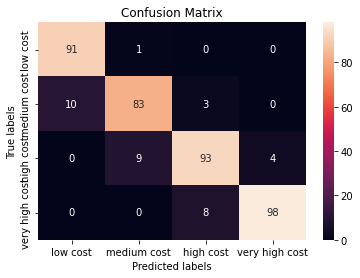

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#**Decision Trees**



**Initial fitting (with default hyperparameters)**





In [ ]:
# importing libaries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import GridSearchCV

In [ ]:
clrs = DecisionTreeClassifier(criterion='gini')
clrs.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# predicting
y_train_pred = clrs.predict(X_train)
print(f"Accuracy is on train {(y_train_pred == y_train).mean()*100}%")

y_test_pred = clrs.predict(X_test)
print(f"Accuracy is test {(y_test_pred == y_test).mean()*100}%")

Accuracy is on train 100.0%
Accuracy is test 85.5%


In [ ]:
# evalution metrics for train
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       404
           2       1.00      1.00      1.00       394
           3       1.00      1.00      1.00       394

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# evalution metrics for test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        92
           1       0.80      0.90      0.84        96
           2       0.78      0.80      0.79       106
           3       0.93      0.82      0.87       106

    accuracy                           0.85       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.85      0.86       400



**Confusion Mtrix**

[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

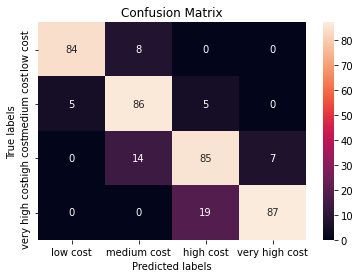

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Hyperparameter Turning**

In [ ]:
clrs = DecisionTreeClassifier(criterion='gini')
tuned_parameters = {"max_depth": [3, 5, 7, 9, 11, 13], "max_leaf_nodes": [19, 21, 23, 25]}
clrs = GridSearchCV(clrs,
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')
clrs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                  

In [ ]:
#checking best parameters
clrs.best_params_

{'max_depth': 7, 'max_leaf_nodes': 25}

In [ ]:
#creating tree with best parameters
clrs = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=25, max_depth= 7)
clrs.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# predicting
y_train_pred = clrs.predict(X_train)
print(f"Accuracy is on train {(y_train_pred == y_train).mean()*100}%")

y_test_pred = clrs.predict(X_test)
print(f"Accuracy is test {(y_test_pred == y_test).mean()*100}%")

Accuracy is on train 90.3125%
Accuracy is test 84.0%


In [ ]:
# evalution metrics for train
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       408
           1       0.89      0.87      0.88       404
           2       0.86      0.87      0.87       394
           3       0.93      0.93      0.93       394

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [ ]:
# evalution metrics for test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        92
           1       0.82      0.80      0.81        96
           2       0.79      0.80      0.79       106
           3       0.89      0.84      0.86       106

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



**confusion matrix**

[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

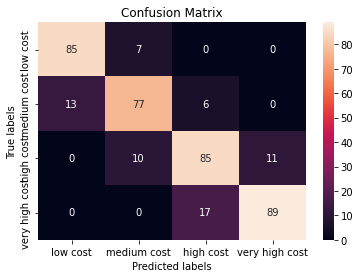

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Plot the variable importance**

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clrs.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()

,Feature,Score
0,ram,0.745632
1,pixels,0.132847
2,battery_power,0.121521
3,dual_sim,0.000000
4,fc,0.000000


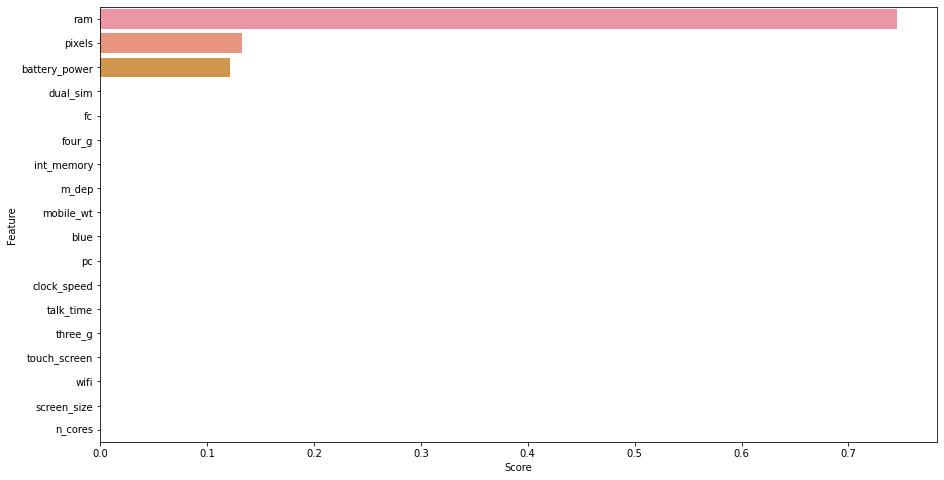

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

**visualizing the tree**

In [ ]:
# importing libaries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

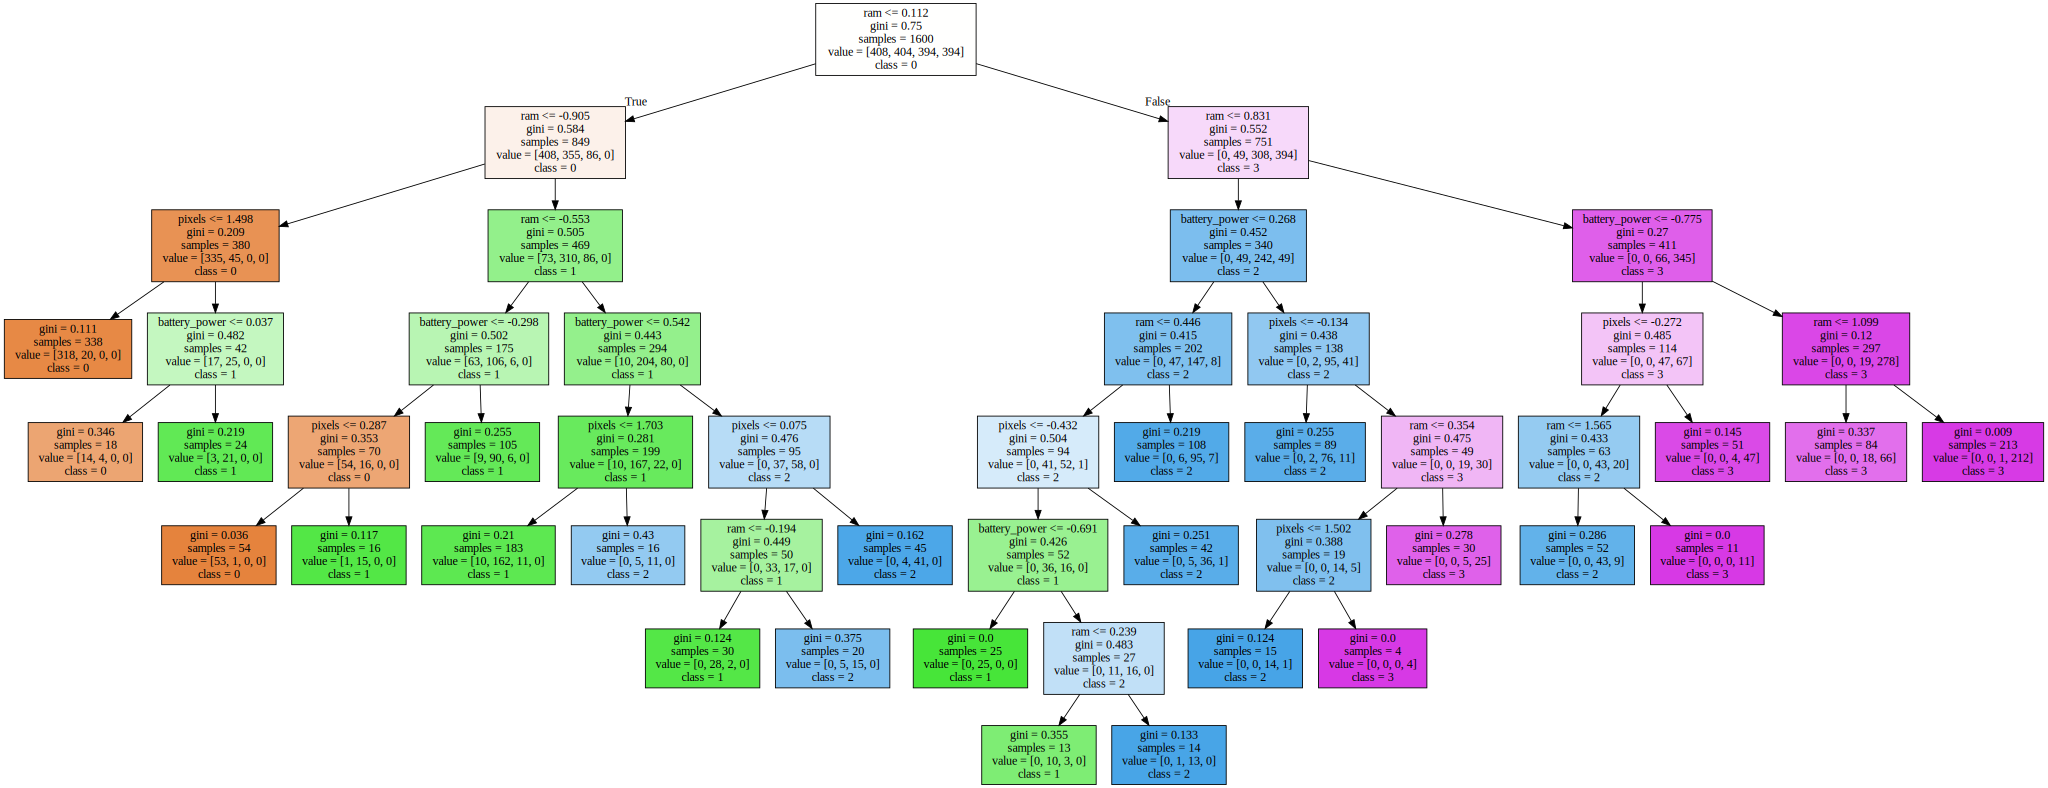

In [ ]:
graph = Source(tree.export_graphviz(clrs, out_file=None
   , feature_names=X.columns, class_names=['0', '1', '2', '3'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

#**Random forest**

**Initial fitting (with default hyperparameters)**

In [ ]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# predicting
y_train_pred = classifier.predict(X_train)
print(f"Accuracy is on train {(y_train_pred == y_train).mean()*100}%")

y_test_pred = classifier.predict(X_test)
print(f"Accuracy is test {(y_test_pred == y_test).mean()*100}%")

Accuracy is on train 100.0%
Accuracy is test 84.25%


In [ ]:
#evalution metrics for train
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       404
           2       1.00      1.00      1.00       394
           3       1.00      1.00      1.00       394

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
#evalution metrics for test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        92
           1       0.81      0.82      0.82        96
           2       0.77      0.77      0.77       106
           3       0.91      0.82      0.86       106

    accuracy                           0.84       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.84      0.84      0.84       400



**Confusion Matrix**

[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

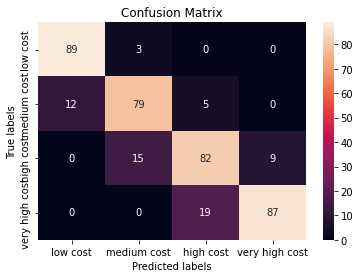

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Hyperparameter Turning**

In [ ]:
grid_values = {'n_estimators':[75, 80, 85, 90], 'max_depth':[7, 9, 11, 13], "max_leaf_nodes": [35, 40, 45, 50]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [ ]:
# best parameters after turning
classifier.best_params_

{'max_depth': 7, 'max_leaf_nodes': 40, 'n_estimators': 80}

In [ ]:
#creating model with best parameters
classifier = RandomForestClassifier(max_depth= 7, n_estimators= 80, max_leaf_nodes = 40, random_state=42, class_weight='balanced')
classifier.fit(X_train, y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# predicting
y_train_pred = classifier.predict(X_train)
print(f"Accuracy is on train {(y_train_pred == y_train).mean()*100}%")

y_test_pred = classifier.predict(X_test)
print(f"Accuracy is test {(y_test_pred == y_test).mean()*100}%")

Accuracy is on train 94.5%
Accuracy is test 82.75%


In [ ]:
#evalution metrics for train
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       408
           1       0.92      0.91      0.91       404
           2       0.93      0.91      0.92       394
           3       0.98      0.98      0.98       394

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



In [ ]:
#evalution metrics for test
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.86      0.97      0.91        92
           1       0.75      0.78      0.77        96
           2       0.78      0.72      0.75       106
           3       0.92      0.86      0.89       106

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



**Confusion Matrix**

[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

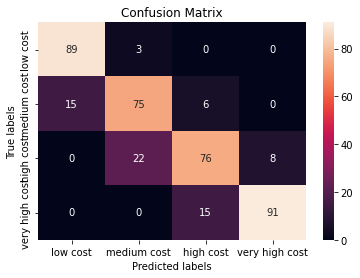

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**plot the variable importance**

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':classifier.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()

,Feature,Score
0,ram,0.689970
1,battery_power,0.072084
2,pixels,0.064336
3,mobile_wt,0.025391
4,screen_size,0.024097


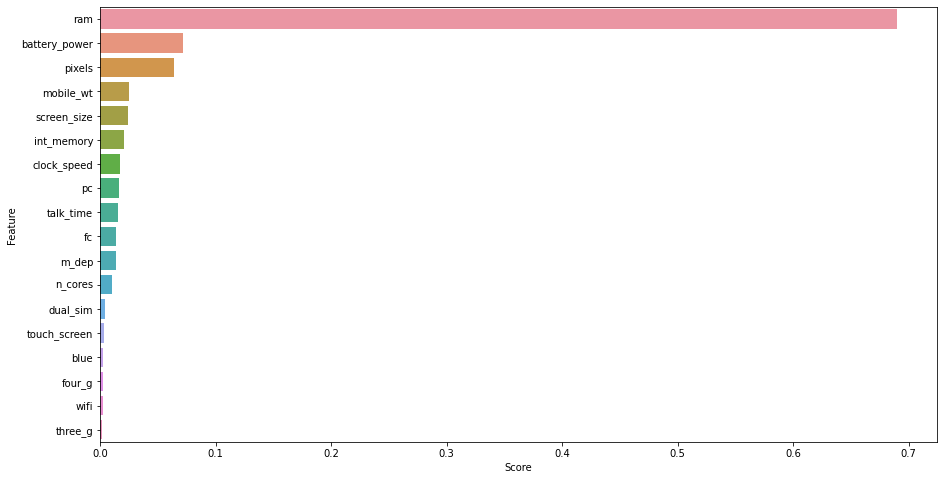

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

#**XGboost**

**Initial fitting (with default hyperparameters)**

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# predicting
y_train_pred = xgb_model.predict(X_train)
print(f"Accuracy is on train {(y_train_pred == y_train).mean()*100}%")

y_test_pred = xgb_model.predict(X_test)
print(f"Accuracy is test {(y_test_pred == y_test).mean()*100}%")

Accuracy is on train 97.6875%
Accuracy is test 87.0%


In [ ]:
#evalution metrics for train
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       0.97      0.97      0.97       404
           2       0.96      0.97      0.96       394
           3       0.99      0.97      0.98       394

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



In [ ]:
#evalution metrics for test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        92
           1       0.83      0.84      0.84        96
           2       0.84      0.80      0.82       106
           3       0.93      0.88      0.90       106

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



**Confusion Matrix**

[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

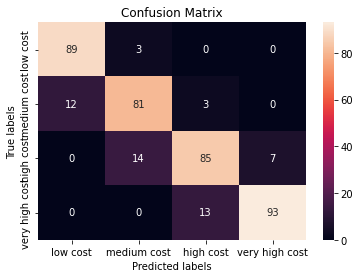

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Hyperparameter Turning**

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
param={
    'learning_rate':[0.01, 0.05, 0.10, 1],
    'max_depth':[3,4,5],
    'n_estimators':[25,50,75,100,150,200],
    'min_child_weight':[1,2,3,4]
}
grid_search = GridSearchCV(xgb_model, param,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 2, 3, 4],
     

In [ ]:
# best parameter
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 200}

In [ ]:
# creating model with best parameter
xgb_model=XGBClassifier(learning_rate= 0.1,
 max_depth = 3,
 min_child_weight = 2,
 n_estimators = 200)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# predicting
y_train_pred = xgb_model.predict(X_train)
print(f"Accuracy is on train {(y_train_pred == y_train).mean()*100}%")

y_test_pred = xgb_model.predict(X_test)
print(f"Accuracy is test {(y_test_pred == y_test).mean()*100}%")

Accuracy is on train 99.8125%
Accuracy is test 86.75%


In [ ]:
#evalution metrics for train
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       0.99      1.00      1.00       404
           2       1.00      0.99      1.00       394
           3       1.00      1.00      1.00       394

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
#evalution metrics
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        92
           1       0.81      0.86      0.83        96
           2       0.83      0.80      0.81       106
           3       0.95      0.86      0.90       106

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



**Confusion Matrix**

[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

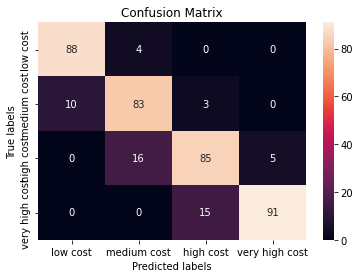

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**plot the variable importance**

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':xgb_model.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()

,Feature,Score
0,ram,0.431520
1,battery_power,0.112688
2,pixels,0.093017
3,mobile_wt,0.035626
4,m_dep,0.031571


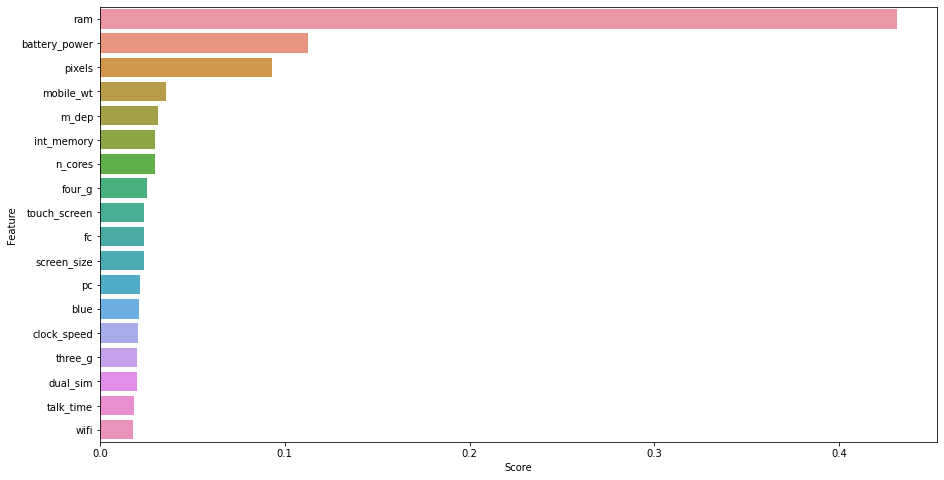

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

#**K NEAREST NEIGHBOR**

**Initial fitting (with default hyperparameters)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# predicting
y_train_pred = knn.predict(X_train)
print(f"Accuracy is on train {(y_train_pred == y_train).mean()*100}%")

y_test_pred = knn.predict(X_test)
print(f"Accuracy is test {(y_test_pred == y_test).mean()*100}%")

Accuracy is on train 70.75%
Accuracy is test 49.5%


In [ ]:
#evalution metrics for train
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       408
           1       0.61      0.65      0.63       404
           2       0.65      0.60      0.62       394
           3       0.88      0.70      0.78       394

    accuracy                           0.71      1600
   macro avg       0.72      0.71      0.71      1600
weighted avg       0.72      0.71      0.71      1600



In [ ]:
#evalution metrics for test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65        92
           1       0.31      0.38      0.34        96
           2       0.44      0.45      0.45       106
           3       0.79      0.45      0.57       106

    accuracy                           0.49       400
   macro avg       0.53      0.50      0.50       400
weighted avg       0.53      0.49      0.50       400



[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

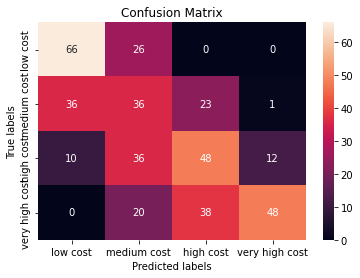

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Hyperparameter Turning**

In [ ]:
parameters = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [ ]:
#Best parameter
model.best_params_

{'n_neighbors': 98}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=98)  
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=98, p=2,
                     weights='uniform')

In [ ]:
# predicting
y_train_pred = knn.predict(X_train)
print(f"Accuracy is on train {(y_train_pred == y_train).mean()*100}%")

y_test_pred = knn.predict(X_test)
print(f"Accuracy is test {(y_test_pred == y_test).mean()*100}%")

Accuracy is on train 69.875%
Accuracy is test 65.0%


In [ ]:
#evalution metrics for train
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       408
           1       0.62      0.52      0.57       404
           2       0.61      0.64      0.62       394
           3       0.84      0.73      0.78       394

    accuracy                           0.70      1600
   macro avg       0.70      0.70      0.69      1600
weighted avg       0.70      0.70      0.70      1600



In [ ]:
#evalution metrics for test
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        92
           1       0.49      0.49      0.49        96
           2       0.55      0.51      0.53       106
           3       0.84      0.72      0.78       106

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400



**confusion matrix**

[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

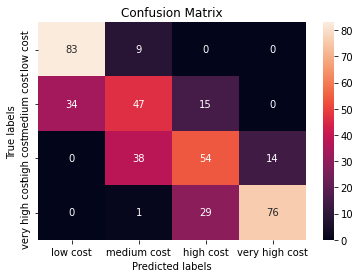

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**plotting number of neighbor vs accuracy**

In [ ]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

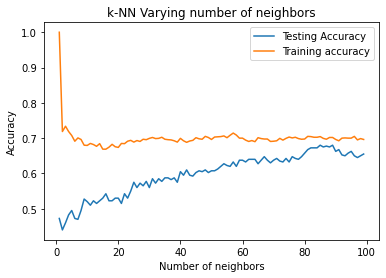

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#**Model Explainability**

In [ ]:
# importing shap

!pip install shap
import shap
shap.initjs()

In [ ]:
# creating a shap instance for training set

l=X.columns.to_list()
X_train_val=pd.DataFrame(X_train,columns=l)
explainer_train = shap.TreeExplainer(xgb_model)
shap_values_train = explainer_train.shap_values(X_train_val)

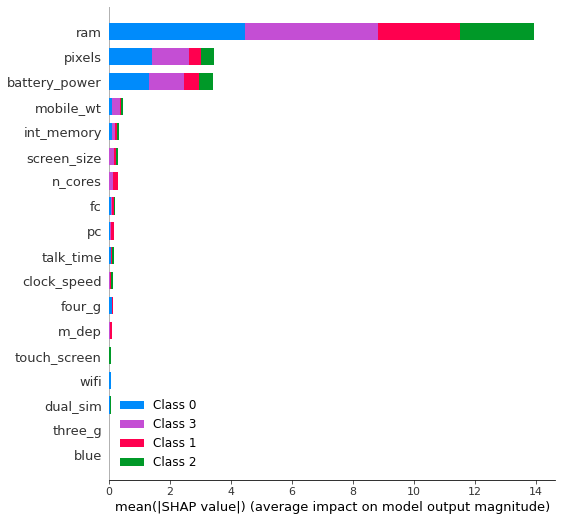

In [ ]:
# visualizing

shap.summary_plot(shap_values_train,X_train_val,plot_type='bar')

In [ ]:
# creating a shap instance for test set

X_test_val=pd.DataFrame(X_test,columns=l)
explainer_train = shap.TreeExplainer(xgb_model)
shap_values_test = explainer_train.shap_values(X_test_val)

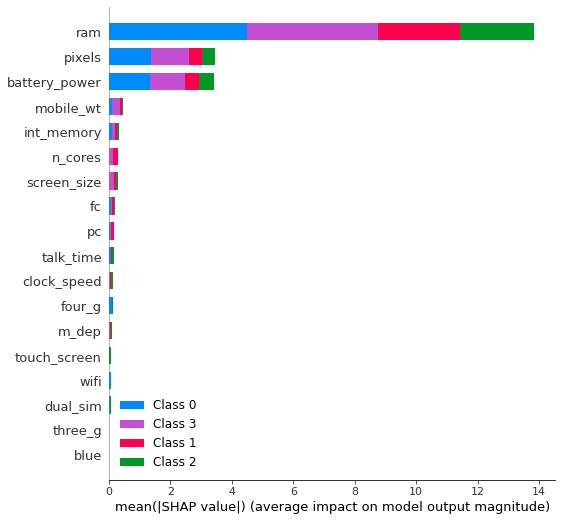

In [ ]:
# visualize

shap.summary_plot(shap_values_test,X_test_val,plot_type='bar')